In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [36]:
file = "D:\Escuela\Precios_S_Todos_los_Datos.csv"

all_variables = ['Y2004','Y2005','Y2006','Y2007', 'Y2008','Y2009','Y2010','Y2011','Y2012','Y2013','Producto']
features = ['Y2004','Y2005','Y2006','Y2007', 'Y2008','Y2009','Y2010','Y2011','Y2012','Y2013']
target = ['Producto']

df = pd.read_csv(file, usecols=all_variables, encoding = 'ISO 8859-1')
df.head()

,Producto,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Albaricoques,59100.0,51200.0,NaN,NaN,27960.0,25070.0,30000.0,27100.0,24500.0,NaN
1,Albaricoques,59100.0,51200.0,NaN,NaN,27960.0,25070.0,30000.0,27100.0,24500.0,NaN
2,Algodón con semilla,210457.1,222376.3,242184.3,310229.3,312793.4,312818.9,381671.4,420284.3,409083.5,NaN
3,Algodón con semilla,210457.1,222376.3,242184.3,310229.3,312793.4,312818.9,381671.4,420284.3,409083.5,NaN
4,"Algodón, fibra",637748.7,673867.5,733891.7,940088.7,947858.8,947936.2,1156580.0,1273588.9,1239646.9,NaN


In [37]:
df = df.reindex(columns=['Y2004','Y2005','Y2006','Y2007', 'Y2008','Y2009','Y2010','Y2011','Y2012','Y2013','Producto'])
df.head(100)

,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Producto
0,59100.0,51200.0,NaN,NaN,27960.0,25070.0,30000.0,27100.0,24500.0,NaN,Albaricoques
1,59100.0,51200.0,NaN,NaN,27960.0,25070.0,30000.0,27100.0,24500.0,NaN,Albaricoques
2,210457.1,222376.3,242184.3,310229.3,312793.4,312818.9,381671.4,420284.3,409083.5,NaN,Algodón con semilla
3,210457.1,222376.3,242184.3,310229.3,312793.4,312818.9,381671.4,420284.3,409083.5,NaN,Algodón con semilla
4,637748.7,673867.5,733891.7,940088.7,947858.8,947936.2,1156580.0,1273588.9,1239646.9,NaN,"Algodón, fibra"
...,...,...,...,...,...,...,...,...,...,...,...
95,489000.0,437000.0,400000.0,420000.0,420000.0,520000.0,523000.0,563000.0,600000.0,444117.7,"Carne, cerdo"
96,4757.7,4375.7,4077.3,4644.6,5006.3,5474.9,5031.9,5580.1,5546.1,4202.9,"Carne, cerdo"
97,620000.0,554000.0,536000.0,536000.0,562800.0,670000.0,675000.0,764000.0,702502.0,711320.8,"Carne, ganado vacuno"
98,620000.0,554000.0,536000.0,536000.0,562800.0,670000.0,675000.0,764000.0,702502.0,711320.8,"Carne, ganado vacuno"


In [38]:
df = df.fillna(0)
df.head(100)

,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Producto
0,59100.0,51200.0,0.0,0.0,27960.0,25070.0,30000.0,27100.0,24500.0,0.0,Albaricoques
1,59100.0,51200.0,0.0,0.0,27960.0,25070.0,30000.0,27100.0,24500.0,0.0,Albaricoques
2,210457.1,222376.3,242184.3,310229.3,312793.4,312818.9,381671.4,420284.3,409083.5,0.0,Algodón con semilla
3,210457.1,222376.3,242184.3,310229.3,312793.4,312818.9,381671.4,420284.3,409083.5,0.0,Algodón con semilla
4,637748.7,673867.5,733891.7,940088.7,947858.8,947936.2,1156580.0,1273588.9,1239646.9,0.0,"Algodón, fibra"
...,...,...,...,...,...,...,...,...,...,...,...
95,489000.0,437000.0,400000.0,420000.0,420000.0,520000.0,523000.0,563000.0,600000.0,444117.7,"Carne, cerdo"
96,4757.7,4375.7,4077.3,4644.6,5006.3,5474.9,5031.9,5580.1,5546.1,4202.9,"Carne, cerdo"
97,620000.0,554000.0,536000.0,536000.0,562800.0,670000.0,675000.0,764000.0,702502.0,711320.8,"Carne, ganado vacuno"
98,620000.0,554000.0,536000.0,536000.0,562800.0,670000.0,675000.0,764000.0,702502.0,711320.8,"Carne, ganado vacuno"


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,0.000005,0.000331,0.000000,0.000000,0.000218,0.000203,0.000251,0.000204,0.000129,0.0
1,0.000005,0.000331,0.000000,0.000000,0.000218,0.000203,0.000251,0.000204,0.000129,0.0
2,0.000019,0.001437,0.000688,0.000056,0.002442,0.002534,0.003190,0.003161,0.002155,0.0
3,0.000019,0.001437,0.000688,0.000056,0.002442,0.002534,0.003190,0.003161,0.002155,0.0
4,0.000057,0.004353,0.002085,0.000169,0.007401,0.007680,0.009667,0.009578,0.006531,0.0


In [40]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,-8.078894e+06,-618997.331530,-9.617406e+05,-1.187698e+05,-259.504901,-24485.979055,14452.965081,-20743.151015,-19082.797200,-4736.565645
1,-8.078894e+06,-618997.331531,-9.617406e+05,-1.187698e+05,-259.504901,-24485.979055,14452.965081,-20743.151016,-19082.797200,-4736.565645
2,-7.927502e+06,-298375.334929,-3.399307e+05,2.542463e+05,-239358.243268,-125026.582104,-262408.649272,-4751.332780,-47299.940113,22075.069694
3,-7.927502e+06,-298375.334930,-3.399307e+05,2.542463e+05,-239358.243269,-125026.582104,-262408.649272,-4751.332779,-47299.940113,22075.069694
4,-7.500125e+06,354314.487998,1.023496e+06,1.072720e+06,-812335.764654,-273513.560132,-856778.388498,31789.686783,-108078.907851,84587.175078


In [41]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.64382687e-01, 3.24011292e-02, 2.66776956e-03, 2.38627691e-04,
       1.34813433e-04, 8.09262973e-05, 5.86378147e-05, 2.16226168e-05,
       1.10070610e-05, 2.77954876e-06])

In [44]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,-8.078894e+06,-618997.331530,-9.617406e+05,-1.187698e+05,-259.504901,-24485.979055,14452.965081,-20743.151015,-19082.797200,-4736.565645,Albaricoques
1,-8.078894e+06,-618997.331531,-9.617406e+05,-1.187698e+05,-259.504901,-24485.979055,14452.965081,-20743.151016,-19082.797200,-4736.565645,Albaricoques
2,-7.927502e+06,-298375.334929,-3.399307e+05,2.542463e+05,-239358.243268,-125026.582104,-262408.649272,-4751.332780,-47299.940113,22075.069694,Algodón con semilla
3,-7.927502e+06,-298375.334930,-3.399307e+05,2.542463e+05,-239358.243269,-125026.582104,-262408.649272,-4751.332779,-47299.940113,22075.069694,Algodón con semilla
4,-7.500125e+06,354314.487998,1.023496e+06,1.072720e+06,-812335.764654,-273513.560132,-856778.388498,31789.686783,-108078.907851,84587.175078,"Algodón, fibra"


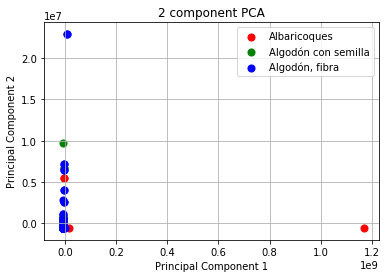

In [46]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Albaricoques', 'Algodón con semilla', 'Algodón, fibra']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

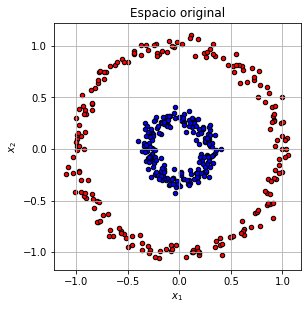

In [47]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

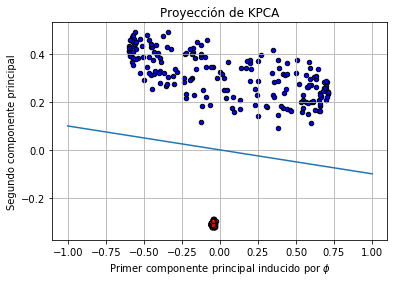

In [48]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()